In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [5]:
df['rm'].fillna(df['rm'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [7]:
x=df.drop('medv',axis=1)
y=df['medv']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

In [11]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.3654 - mae: 22.3654 - mse: 594.8276
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.5162 - mae: 21.5162 - mse: 558.5023
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3311 - mae: 20.3311 - mse: 491.934145
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.7921 - mae: 18.7921 - mse: 426.7742 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.7947 - mae: 18.7947 - mse: 441.5402  
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5689 - mae: 17.5689 - mse: 403.0473 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.1627 - mae: 16.1627 - mse: 366.2913  
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.0756 - mae: 14.0756 - mse: 282.1133 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6204 - mae: 12.6204 - mse: 249.5367
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7961 - mae: 11.7961 - mse: 218.3096 
Epoch 11/50
12/12 ━

In [12]:
metrics = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6297 - mae: 5.6297 - mse: 76.3656  


In [13]:
metrics

[5.26904296875, 63.1380729675293, 5.26904296875]

In [14]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [15]:
y_test = np.array(y_test).reshape(-1,1)

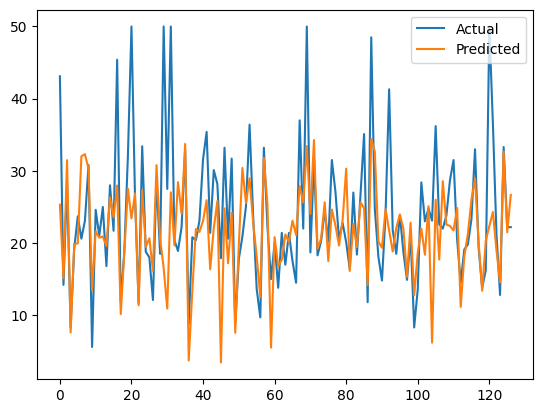

In [16]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()